In [15]:
import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.special import roots_legendre

# Zadanie 1

In [11]:
def f(x):
    return 4 / (1 + x**2)

def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f(midpoints) * widths)  
    
def calculate_integral_error(method, m):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        integral = method(y, x=x)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

In [ ]:
m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25)
errors_trapezoidal = calculate_integral_error(trapezoid, 25)
errors_simpson = calculate_integral_error(simpson, 25)

plt.figure(figsize=(12, 6))
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 2

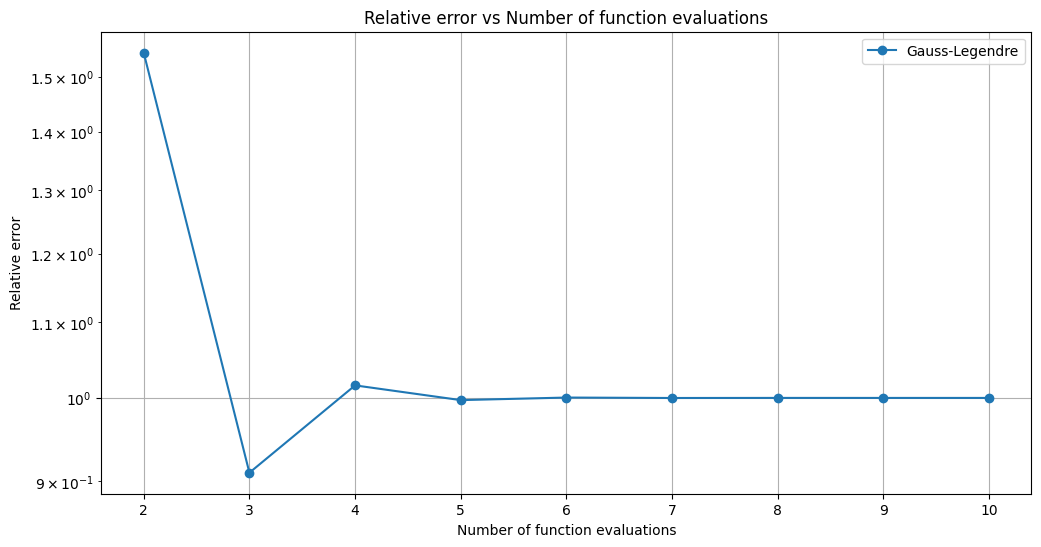

In [32]:
def gauss_legendre_integration(n):
    x, w = roots_legendre(n)
    integral = np.sum(w * f(x))
    return integral

def calculate_integral_error_gauss_legendre(n_values):
    errors = []
    for n in n_values:
        integral = gauss_legendre_integration(n)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

n_values = np.arange(1, 10)

errors_gauss_legendre = calculate_integral_error_gauss_legendre(n_values)

plt.figure(figsize=(12, 6))
plt.plot(n_values + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')

plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

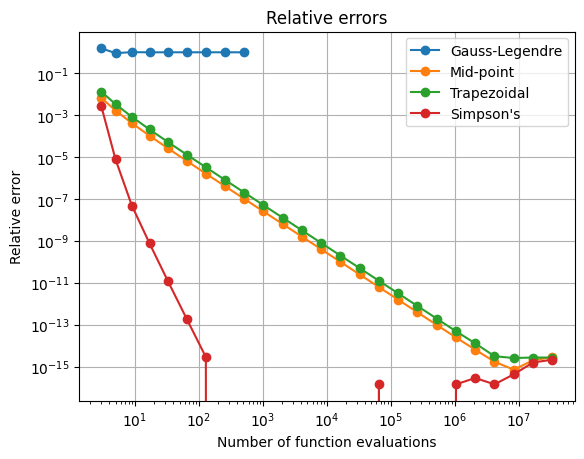

In [30]:
plt.plot(2**(n_values) + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative errors')
plt.legend()
plt.grid(True)
plt.show()